### BikeSharing On Demand 
* 자전거 대여수를 예측 - 회귀
1. Data Loading
2. Data Preprocessing
3. Visualization
4. Feature Engineering
5. Model / Training / Prediction
7. Submission

### 1. Data Load

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/bike/train.csv', parse_dates=['datetime'])
test = pd.read_csv('data/bike/test.csv', parse_dates=['datetime'])

print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [4]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [7]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
# 계절
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [23]:
def val_count(colname):
    return train[colname].value_counts().sort_values(ascending=False)

In [24]:
val_count('season')

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [25]:
# holiday 휴일여부 1=휴일
val_count('holiday')

0    10575
1      311
Name: holiday, dtype: int64

In [16]:
# workingday 근무일여부 0=주말, 1=주중
val_count('workingday')

1    7412
0    3474
Name: workingday, dtype: int64

In [18]:
# weather 1=날씨좋음
val_count('weather')

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [27]:
# temp
val_count('temp')

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [29]:
# windspeed
val_count('windspeed')

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [31]:
# count(대여수)
val_count('count')

5      169
4      149
3      144
6      135
2      132
      ... 
900      1
948      1
589      1
629      1
843      1
Name: count, Length: 822, dtype: int64

In [33]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [35]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


### 2. Data Preprocessing (전처리)
* datetime 컬럼에서 년/월/일/시/분/초/요일 추출해서 새로운 컬럼을 만든다

In [41]:
print(type(train['datetime'].dt))
train['datetime'].dt.year

<class 'pandas.core.indexes.accessors.DatetimeProperties'>


0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [ ]:
train_test_data = [train,test]

for data in train_test_data:
    #년도
    data['datetime-year'] = data['datetime'].dt.year
    #월
    data['datetime-month'] = data['datetime'].dt.month
    #일
    data['datetime-day'] = data['datetime'].dt.day
    #시간
    data['datetime-hour'] = data['datetime'].dt.hour
    #분
    data['datetime-minute'] = data['datetime'].dt.minute
    #초
    data['datetime-second'] = data['datetime'].dt.second
    #요일
    data['datetime-dayofweek'] = data['datetime'].dt.dayofweek

    
print(train.columns)    
print(test.columns)

### 3. Visualization (시각화)

In [52]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='season', ylabel='count'>

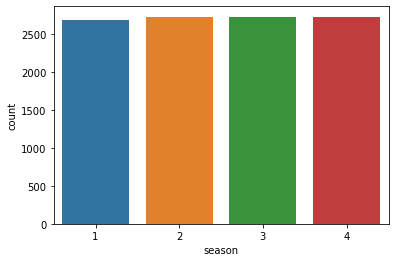

In [54]:
# season 
sns.countplot(data=train, x='season')

<AxesSubplot:xlabel='weather', ylabel='count'>

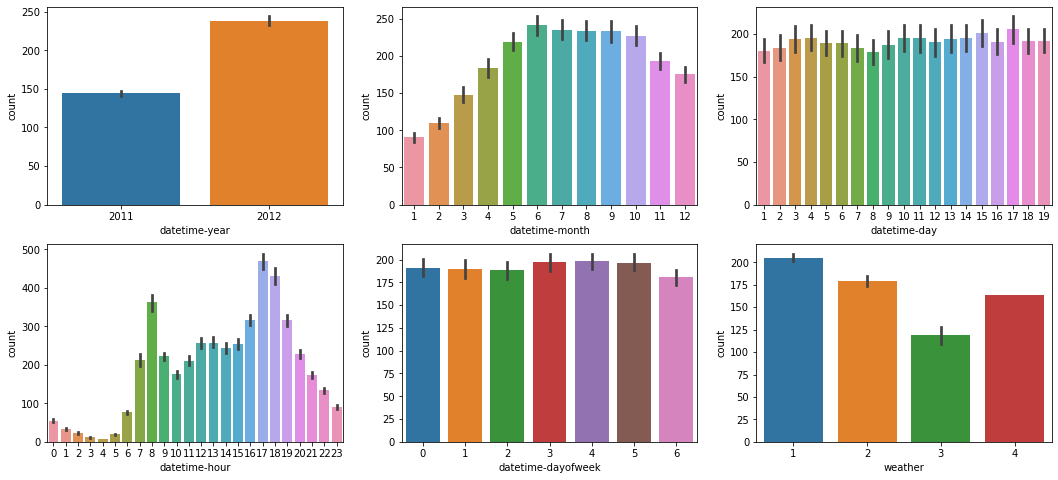

In [63]:
# Figure를 6개의 Axes로 분할 
figure,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data=train, x='datetime-dayofweek', y='count', ax=ax5)
sns.barplot(data=train, x='weather', y='count', ax=ax6)

In [66]:
train['datetime-day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [67]:
test['datetime-day'].unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64)

In [69]:
# 년도와월을 합친 datetime-year-month 컬럼을 추가 (훈련데이터에만)
# 2021-3
train['datetime-year-month'] = \
train['datetime-year'].astype('str') + '-' + train['datetime-month'].astype('str')

train[['datetime-year','datetime-month','datetime-year-month']].head()

,datetime-year,datetime-month,datetime-year-month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1


<AxesSubplot:xlabel='datetime-year-month', ylabel='count'>

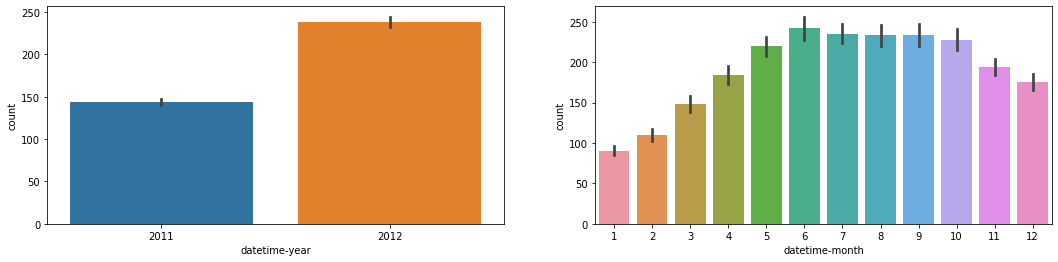

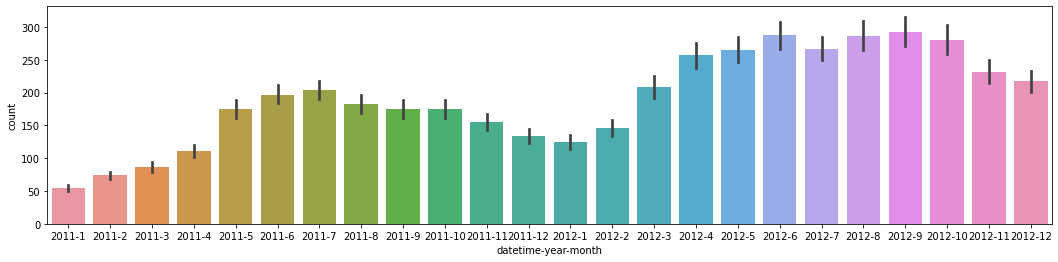

In [73]:
figure,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)

figure,ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year-month', y='count', ax=ax3)